This notebook was designed to be run from [Google Colab](https://colab.research.google.com) to process the 2017 trips dataset (which I have assembled and [hosted on my Google Drive](https://drive.google.com/open?id=1L-uci9bnJ5WBJAltvT5kLjF0XsoSOcKs)) to produce the balanced trips dataset. 

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

x_train_id =
y_train_id = 
x_test_id = '1eeuGElHLV8-T8ZXSumHCqP5Ym3NqJuR4'
y_test_id = '1EYMc3oAgoVwa2U0NESfM2lkUfnuf-RUN'

csv_import =  drive.CreateFile({'id':'1L-uci9bnJ5WBJAltvT5kLjF0XsoSOcKs'}) # Load my dataset from google drive
csv_import.GetContentFile('citibike-2017.csv.zip')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# df = pd.read_csv('july-2017.csv')
df = pd.read_csv('../data/citibike-2017.csv.zip')
df['start station name'] = df['start station name'].str.lower()
df['end station name'] = df['end station name'].str.lower()
print(f'Number of trips: {df.shape}')
df.head()

Number of trips: (16364657, 15)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,w 82 st & central park west,40.782750,-73.971370,3165,central park west & w 72 st,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,cooper square & e 7 st,40.729236,-73.990868,498,broadway & w 32 st,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 ave & e 78 st,40.776829,-73.963888,3152,3 ave & e 71 st,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 ave & e 78 st,40.776829,-73.963888,3152,3 ave & e 71 st,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 ave & e 78 st,40.776829,-73.963888,3152,3 ave & e 71 st,40.768737,-73.961199,26819,Customer,NaN,0


In [5]:
trips_agg = df.groupby(['start station name', 'end station name'])['tripduration'].agg(['sum', 'mean'])
trips_agg.head()

sum         mean
start station name end station name                    
1 ave & e 110 st   1 ave & e 110 st  27874  1072.076923
                   1 ave & e 68 st    7654  1093.428571
                   1 ave & e 78 st   47455   777.950820
                   1 ave & e 94 st    7814   520.933333
                   11 ave & w 27 st   2221  2221.000000

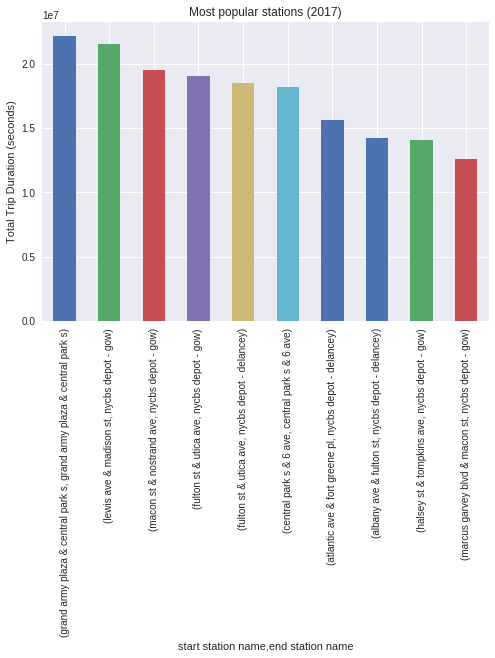

In [6]:
total_trips = trips_agg['sum'].sort_values(ascending=False)
plt.title('Most popular stations (2017)')
plt.ylabel('Total Trip Duration (seconds)')
total_trips.nlargest(10).plot(kind='bar', sort_columns=True)

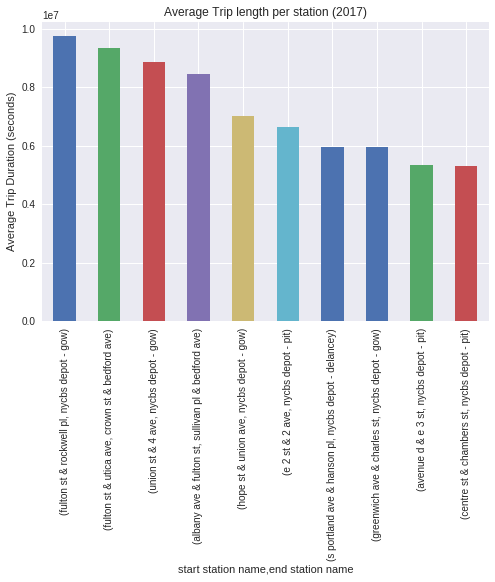

In [7]:
average_trips = trips_agg['mean'].sort_values(ascending=False)
plt.title('Average Trip length per station (2017)')
plt.ylabel('Average Trip Duration (seconds)')
average_trips.nlargest(10).plot(kind='bar', sort_columns=True)

([<matplotlib.patches.Wedge at 0x7f8a58c754e0>,
 [Text(1.09804,0.0656802,'round_trip'),
  Text(-1.09804,-0.0656802,'one_way_trip')],
 [Text(0.598929,0.0358256,'1.9%'), Text(-0.598929,-0.0358255,'98.1%')])

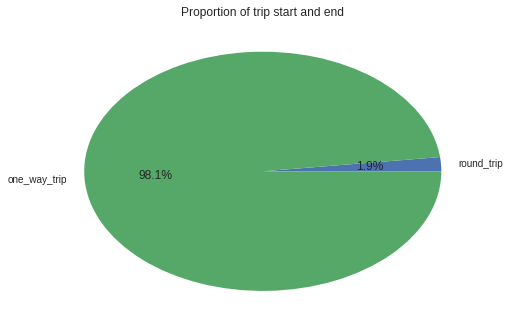

In [8]:
round_trip = df.loc[df['start station name'] == df['end station name']].groupby(['start station name'])['tripduration'].agg(['sum', 'count'])
one_way_trip = df.loc[df['start station name'] != df['end station name']].groupby(['start station name', 'end station name'])['tripduration'].agg(['sum', 'count'])

trip_proportions = {
    'round_trip': round_trip['count'].sum(),
    'one_way_trip': one_way_trip['count'].sum()
}
trip_proportions['round_trip'] = trip_proportions['round_trip'] / (trip_proportions['round_trip'] + trip_proportions['one_way_trip'])
trip_proportions['one_way_trip'] = trip_proportions['one_way_trip'] / (trip_proportions['round_trip'] + trip_proportions['one_way_trip'])

plt.title('Proportion of trip start and end')
plt.pie(list(trip_proportions.values()), labels=list(trip_proportions.keys()), autopct='%1.1f%%')

Text(0,0.5,'Number of Trips')

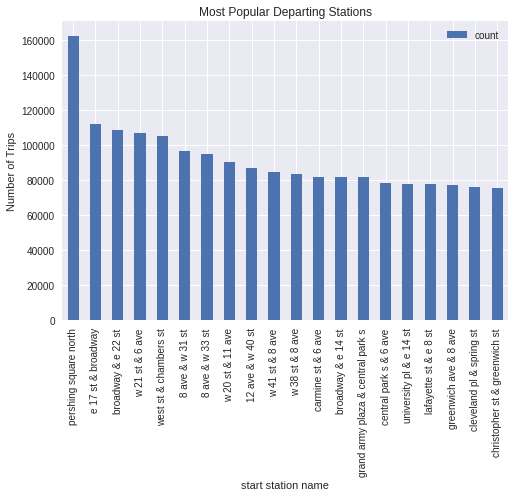

In [9]:
outgoing_stations = df.groupby(['start station name'])['tripduration'].agg(['count'])

ax = outgoing_stations.nlargest(20, columns=['count']).plot(kind='bar', sort_columns=True, title='Most Popular Departing Stations')
ax.set_ylabel('Number of Trips')

Text(0,0.5,'Number of Trips')

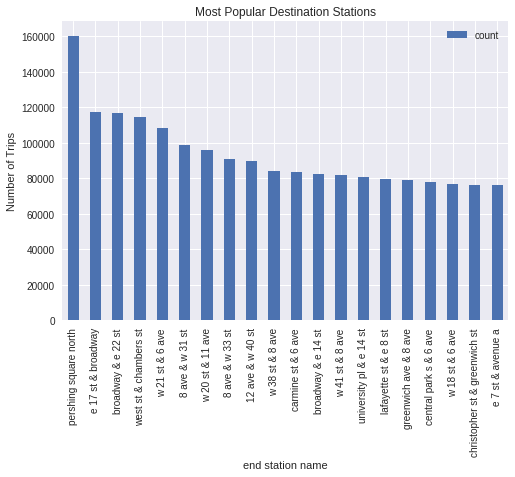

In [10]:
incoming_stations = df.groupby(['end station name'])['tripduration'].agg(['count'])

ax = incoming_stations.nlargest(20, columns=['count']).plot(kind='bar', sort_columns=True, title='Most Popular Destination Stations')
ax.set_ylabel('Number of Trips')

In [0]:
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

This section constructs the "balancing trips", it finds all trips for each unique bike where a trip starts from a different location then it last ended. 

In [10]:
bike_ids = df['bikeid'].unique()
rebalanced_bikes = pd.DataFrame(columns=df.columns)

out = display(progress(0, bike_ids.shape[0]), display_id=True)
i = 0

for bike_id in bike_ids:
  i += 1
  out.update(progress(i, bike_ids.shape[0]))
  bike_trips = df.loc[df['bikeid'] == bike_id]
  bike_trips['next start station name'] = bike_trips['start station name'].shift(-1) # Sorted by time, get the starting point of the next trip
  
  # If a trip starts in a different place then the last one ended, i'll assume the bike was relocated for rebalancing
  rebalanced_trips = bike_trips.loc[bike_trips['end station name'] != bike_trips['next start station name']][:-1] 
  
  rebalanced_bikes = rebalanced_bikes.append(rebalanced_trips, ignore_index=True)
  
rebalanced_bikes[['end station name', 'next start station name']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,end station name,next start station name
0,central park west & w 102 st,w 90 st & amsterdam ave
1,dekalb ave & hudson ave,s 5 pl & s 4 st
2,laight st & hudson st,myrtle ave & lewis ave
3,e 17 st & broadway,1 ave & e 18 st
4,8 ave & w 52 st,pershing square south


In [16]:
bike_ids = df['bikeid'].unique()
rebalanced_bikes = pd.DataFrame(columns=df.columns)

out = display(progress(0, bike_ids.shape[0]), display_id=True)
i = 0

for bike_id in bike_ids:
  i += 1
  out.update(progress(i, bike_ids.shape[0]))
  bike_trips = df.loc[df['bikeid'] == bike_id]
  bike_trips['next start station id'] = bike_trips['start station id'].shift(-1) # Sorted by time, get the starting point of the next trip
  bike_trips['next starttime'] = bike_trips['starttime'].shift(-1)
  
  # If a trip starts in a different place then the last one ended, i'll assume the bike was relocated for rebalancing
  rebalanced_trips = bike_trips.loc[bike_trips['end station id'] != bike_trips['next start station id']][:-1] 
  
  rebalanced_bikes = rebalanced_bikes.append(rebalanced_trips, ignore_index=True)
  
rebalanced_bikes.head()
rebalanced_bikes.to_csv('rebalanced_bike2.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [0]:
from google.colab import files

# rebalanced_bikes.to_csv('rebalanced_bike.csv')
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# file_list = drive.ListFile({'q': "trashed=false"}).GetList()
# for file1 in file_list:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

files.download('rebalanced_bike2.csv')